In [0]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [0]:
# load data
import pandas as pd
dataset = pd.read_csv('modeldata.csv', sep ='|')

In [3]:
dataset.shape

(132224, 21)

In [4]:
dataset.head()

,failure,model,date,serial_number,smart_1_raw,smart_2_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_8_raw,smart_9_raw,smart_10_raw,smart_11_raw,smart_12_raw,smart_13_raw,smart_15_raw,smart_22_raw,smart_16_raw,smart_17_raw,smart_18_raw
0,0,Hitachi HDS5C3030ALA630,2016-01-01,MJ0351YNG9Z0XA,0,108,540,14,0.0,0.000000e+00,37,27929,0,0,14,0,0,0,5,0,654690
1,0,Hitachi HDS5C3030ALA630,2016-01-01,MJ0351YNG9Z0XA,0,108,540,14,0.0,0.000000e+00,37,27929,0,0,14,0,0,0,5,0,654690
2,0,ST4000DM000,2016-01-01,Z305B2QN,54551400,0,0,4,0.0,1.112537e-308,0,411,0,0,4,0,0,0,4,0,654313
3,0,ST4000DM000,2016-01-01,Z305B2QN,54551400,0,0,4,0.0,1.112537e-308,0,411,0,0,4,0,0,0,4,0,654313
4,0,Hitachi HDS5C3030ALA630,2016-01-01,MJ0351YNG9Z7LA,0,104,566,19,0.0,0.000000e+00,37,27492,0,0,18,0,0,0,8,1,655582


In [5]:
dataset.describe()


,failure,smart_1_raw,smart_2_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_8_raw,smart_9_raw,smart_10_raw,smart_11_raw,smart_12_raw,smart_13_raw,smart_15_raw,smart_22_raw,smart_16_raw,smart_17_raw,smart_18_raw
count,132224.000000,1.322240e+05,132224.000000,132224.000000,132224.000000,132224.000000,1.322240e+05,132224.000000,132224.000000,132224.000000,132224.000000,132224.000000,132224.000000,132224.0,132224.000000,132224.000000,132224.000000,132224.000000
mean,0.001550,6.659245e+07,29.334440,365.021464,12.895775,1.777308,6.364643e-309,11.477251,13977.033534,25.279148,1.430799,10.809762,0.017954,0.0,0.068066,5.003880,0.500325,654653.148967
std,0.039345,7.854000e+07,46.351744,1110.234771,129.620630,101.781610,0.000000e+00,18.243676,12881.877410,2715.317011,29.045568,47.730764,4.616458,0.0,2.608074,2.242782,0.706521,808.244362
min,0.000000,0.000000e+00,0.000000,0.000000,1.000000,-29.233785,0.000000e+00,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,651309.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,3.000000,0.000000,0.000000e+00,0.000000,2702.000000,0.000000,0.000000,3.000000,0.000000,0.0,0.000000,3.000000,0.000000,654110.000000
50%,0.000000,3.144133e+07,0.000000,0.000000,6.000000,0.000000,1.112537e-308,0.000000,11579.000000,0.000000,0.000000,6.000000,0.000000,0.0,0.000000,5.000000,0.000000,654653.000000
75%,0.000000,1.272630e+08,99.000000,520.000000,15.000000,0.000000,1.112537e-308,37.000000,20241.000000,0.000000,0.000000,14.000000,0.000000,0.0,0.000000,6.000000,1.000000,655198.000000
max,1.000000,8.798246e+08,196.000000,9683.000000,26674.000000,16096.000000,1.182070e-308,68.000000,88679.000000,393216.000000,5416.000000,16415.000000,1187.000000,0.0,100.000000,17.000000,5.000000,658153.000000


#The data has lot of outliers; but real data can also be messy in the same way; it's better to choose an algo that is robust to algo than removing them as better algo's are available these days

In [6]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132224 entries, 0 to 132223
Data columns (total 21 columns):
failure          132224 non-null int64
model            132224 non-null object
date             132224 non-null object
serial_number    132224 non-null object
smart_1_raw      132224 non-null int64
smart_2_raw      132224 non-null int64
smart_3_raw      132224 non-null int64
smart_4_raw      132224 non-null int64
smart_5_raw      132224 non-null float64
smart_7_raw      132224 non-null float64
smart_8_raw      132224 non-null int64
smart_9_raw      132224 non-null int64
smart_10_raw     132224 non-null int64
smart_11_raw     132224 non-null int64
smart_12_raw     132224 non-null int64
smart_13_raw     132224 non-null int64
smart_15_raw     132224 non-null int64
smart_22_raw     132224 non-null int64
smart_16_raw     132224 non-null int64
smart_17_raw     132224 non-null int64
smart_18_raw     132224 non-null int64
dtypes: float64(2), int64(16), object(3)
memory usage: 21.2+ MB

##no missing values

In [7]:
dataset.columns

Index(['failure', 'model', 'date', 'serial_number', 'smart_1_raw',
       'smart_2_raw', 'smart_3_raw', 'smart_4_raw', 'smart_5_raw',
       'smart_7_raw', 'smart_8_raw', 'smart_9_raw', 'smart_10_raw',
       'smart_11_raw', 'smart_12_raw', 'smart_13_raw', 'smart_15_raw',
       'smart_22_raw', 'smart_16_raw', 'smart_17_raw', 'smart_18_raw'],
      dtype='object')

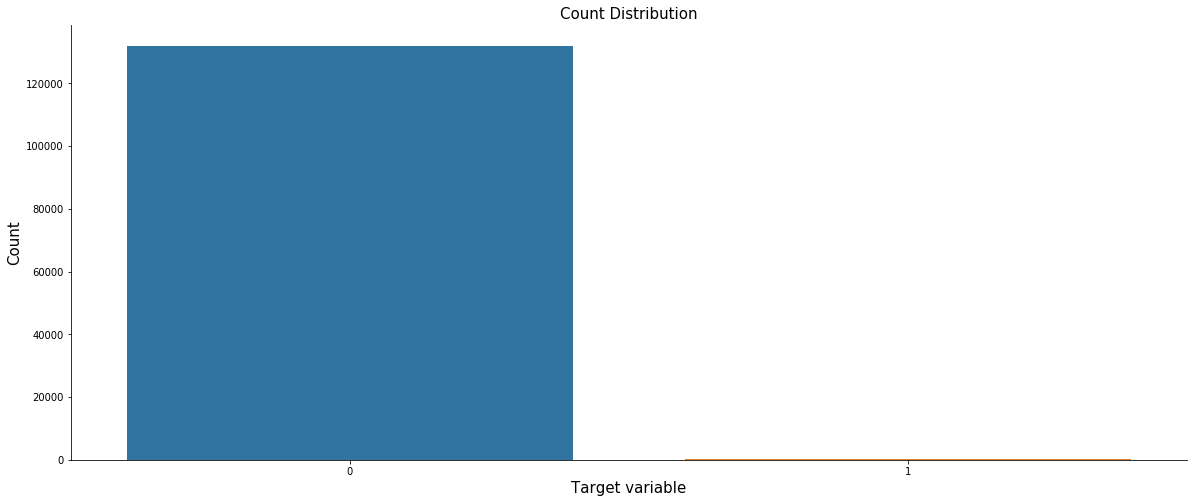

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'failure', data = dataset)
ax.set_xlabel('Target variable', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Count Distribution', fontsize=15)
sns.despine()



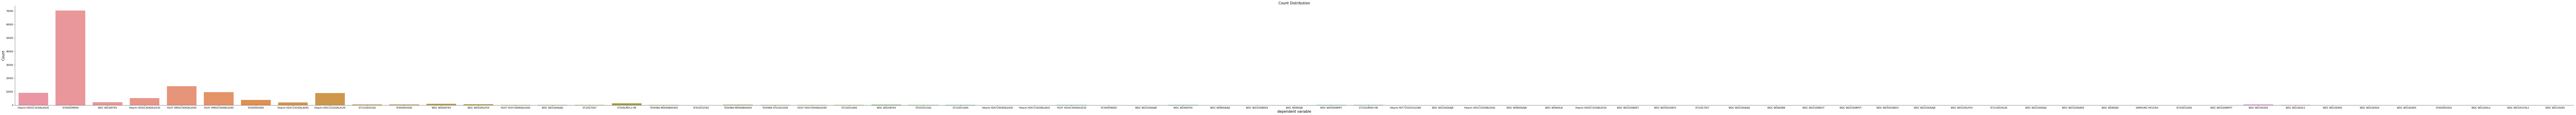

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(200, 8)
sns.countplot(x = 'model', data = dataset)
ax.set_xlabel('dependent variable', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Count Distribution', fontsize=15)
sns.despine()



**The above plot shows that data is highly imbalanced and skewed**

#if we closely look at the data, we can feature engineer to remove categorical columns as they contain the duplicate information and this information can be gained by the model from other dependent variables. 

In [0]:
# split data into X and y
X = dataset.iloc[:,4:21] 
Y = dataset.iloc[:,0]

In [11]:
X.head()

,smart_1_raw,smart_2_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_8_raw,smart_9_raw,smart_10_raw,smart_11_raw,smart_12_raw,smart_13_raw,smart_15_raw,smart_22_raw,smart_16_raw,smart_17_raw,smart_18_raw
0,0,108,540,14,0.0,0.000000e+00,37,27929,0,0,14,0,0,0,5,0,654690
1,0,108,540,14,0.0,0.000000e+00,37,27929,0,0,14,0,0,0,5,0,654690
2,54551400,0,0,4,0.0,1.112537e-308,0,411,0,0,4,0,0,0,4,0,654313
3,54551400,0,0,4,0.0,1.112537e-308,0,411,0,0,4,0,0,0,4,0,654313
4,0,104,566,19,0.0,0.000000e+00,37,27492,0,0,18,0,0,0,8,1,655582


In [12]:
Y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: failure, dtype: int64

In [0]:
# split data into train and test sets
seed = 20
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [14]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

#XGBoost is chosen because it is an ensemble approach with trees which makes it robust to outliers

In [0]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [16]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 100.00%


#the data needn't be normalised as it already gives out 100% accuracy; avoidable tasks can always be avoided

In [17]:
#class wise accuracy
target_names = ['class 0', 'class 1']
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     43568
     class 1       1.00      0.97      0.98        66

   micro avg       1.00      1.00      1.00     43634
   macro avg       1.00      0.98      0.99     43634
weighted avg       1.00      1.00      1.00     43634



#The overall accuracy can be misleading. But the individual class accuracy is also equally good. Hence model works fine

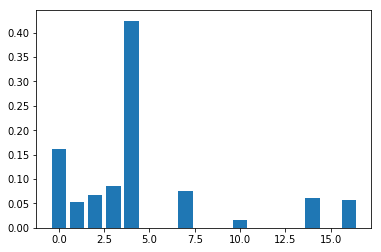

In [18]:
from matplotlib import pyplot
# feature importance plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

#if we remove the columns with highest importance then the accuracy should drop; this plainly for the purpose of cross checking

In [0]:
# split data into X and y
X = dataset.iloc[:,9:21] 
Y = dataset.iloc[:,0]

In [20]:
X.head()

,smart_7_raw,smart_8_raw,smart_9_raw,smart_10_raw,smart_11_raw,smart_12_raw,smart_13_raw,smart_15_raw,smart_22_raw,smart_16_raw,smart_17_raw,smart_18_raw
0,0.000000e+00,37,27929,0,0,14,0,0,0,5,0,654690
1,0.000000e+00,37,27929,0,0,14,0,0,0,5,0,654690
2,1.112537e-308,0,411,0,0,4,0,0,0,4,0,654313
3,1.112537e-308,0,411,0,0,4,0,0,0,4,0,654313
4,0.000000e+00,37,27492,0,0,18,0,0,0,8,1,655582


In [0]:
# split data into train and test sets
seed = 20
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [29]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [value for value in y_pred]

In [31]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 99.85%


# The accuracy drops confirming our assumption. IF we look at the precision and recall of Class 1, here it has become '0' now.But there is only minor drop in accuracy, which due to highly imbalanced data. So the model wass trained perfectly fine earlier. we can also train with less no of dependent variables. Since data is not huge, such extra effort is unwanted

In [32]:
#class wise accuracy
target_names = ['class 0', 'class 1']
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     43568
     class 1       0.00      0.00      0.00        66

   micro avg       1.00      1.00      1.00     43634
   macro avg       0.50      0.50      0.50     43634
weighted avg       1.00      1.00      1.00     43634



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#Error Analysis

In [33]:
prob_test = model.predict_proba(X_test)
prob_test

array([[9.9826974e-01, 1.7302871e-03],
       [9.9912226e-01, 8.7776256e-04],
       [9.9874240e-01, 1.2576059e-03],
       ...,
       [9.9973398e-01, 2.6599586e-04],
       [9.9895054e-01, 1.0494771e-03],
       [9.9973398e-01, 2.6599586e-04]], dtype=float32)

In [34]:
print(prob_test[:,0].shape)
print(y_test.shape)
print(y_pred.shape)

(43634,)
(43634,)
(43634,)


In [0]:
#error analysis
import numpy as np
import pandas as pd
prob_tests = pd.DataFrame({"prob_test":prob_test[:,0], "y_test": y_test, "y_pred":y_pred}, columns=['prob_test', 'y_test', 'y_pred'])

#To understand the models performs worse on which "model" & corresponding "serial number" to understand better 

In [0]:
X_train_xtra = X_train.iloc[:,0:3]
X_train = X_train.iloc[:,3:21]
X_test_xtra = X_test.iloc[:,0:3]
X_test = X_test.iloc[:,3:21]

In [0]:
new = pd.concat([prob_tests,X_test_xtra], axis=1)
new_result = pd.concat([new, X_test],axis=1)
new_result.to_csv("final_result.csv")

#Manual scrutinizing shows that the performs worse on ST4000DM000 largely due to the number instances it has in the data. Nothing more can be done here. 